Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [4]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [5]:
customers.info()
products.info()
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [6]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [11]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [12]:
mergedlist = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


1.1. Top-Selling Products

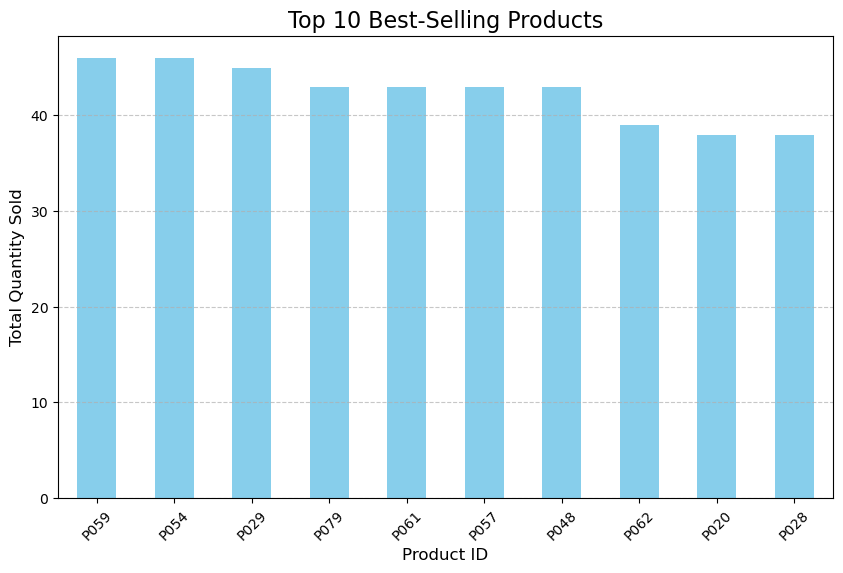

In [13]:
import matplotlib.pyplot as plt

top_selling = mergedlist.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_selling.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1.2. Revenue by Region

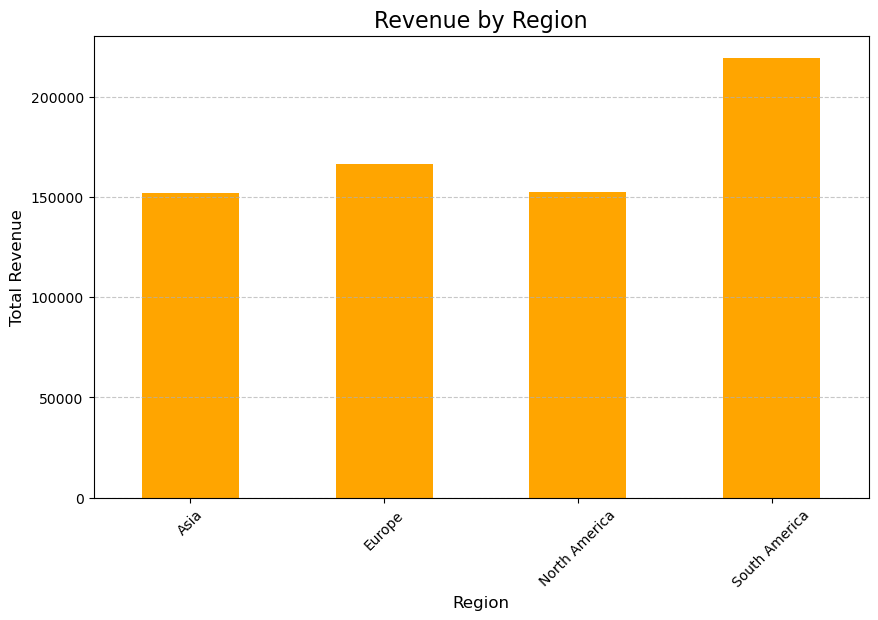

In [14]:
revenue_by_region = mergedlist.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='orange')
plt.title('Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1.3. Signup Trends

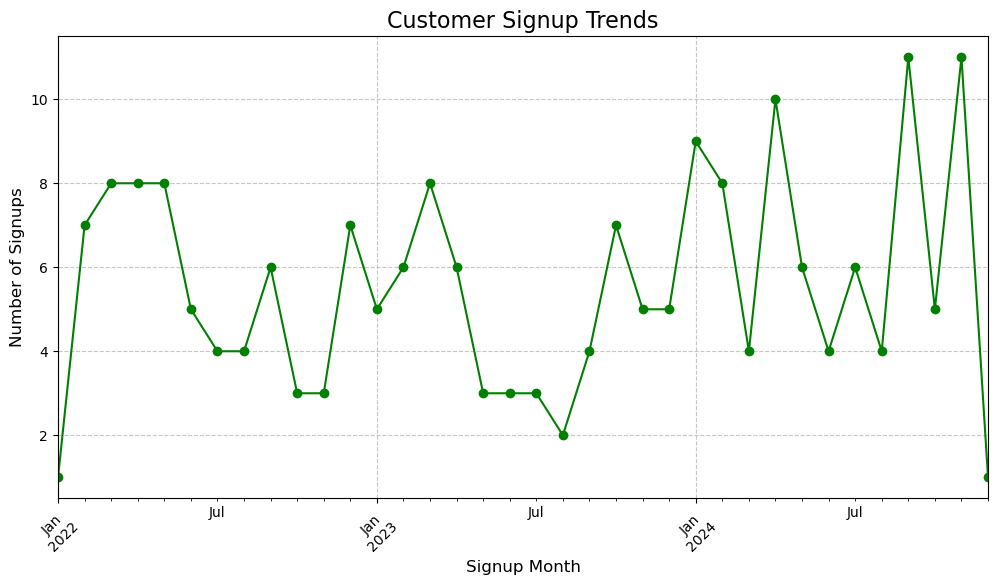

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth')['CustomerID'].count()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signup Trends', fontsize=16)
plt.xlabel('Signup Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


1.4. High-Value Customers

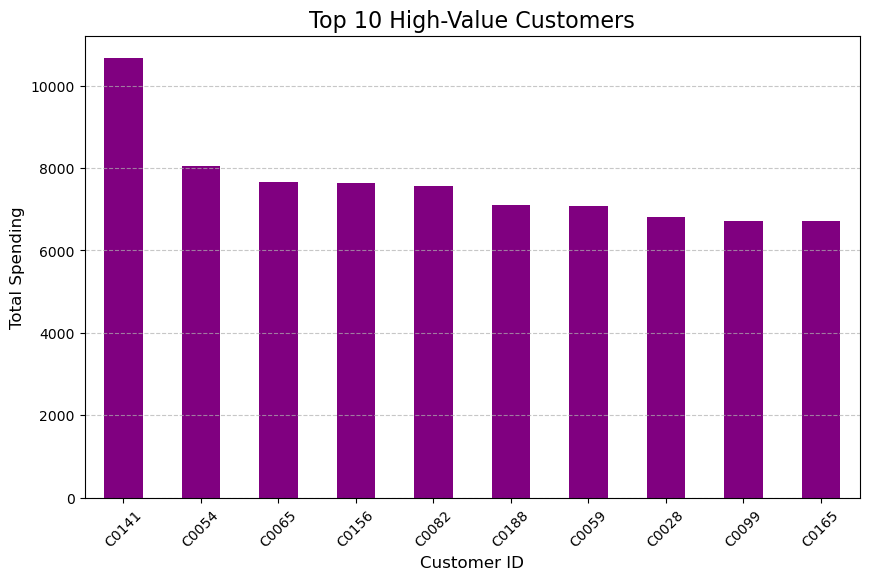

In [16]:
high_value_customers = mergedlist.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
high_value_customers.plot(kind='bar', color='purple')
plt.title('Top 10 High-Value Customers', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1.5 Product Category Performance

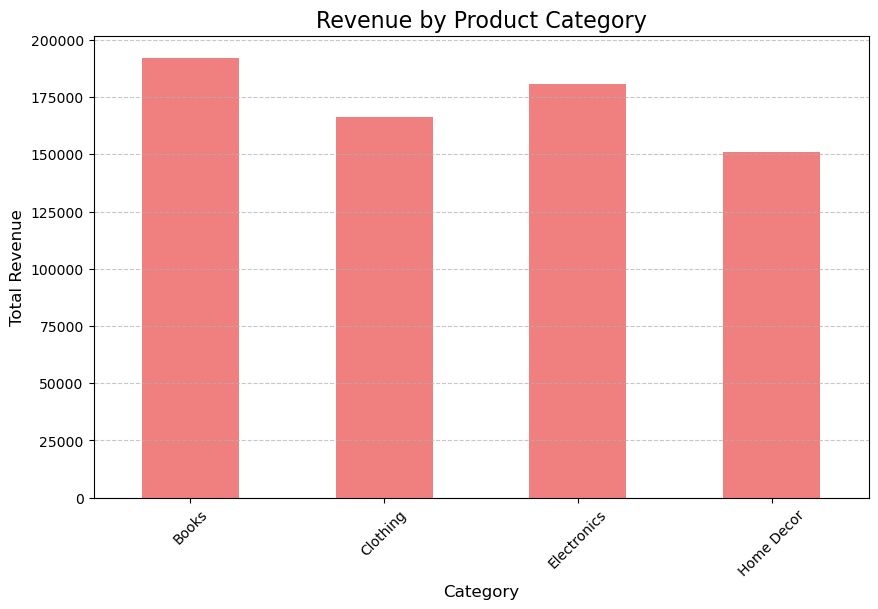

In [29]:
category_revenue = mergedlist.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='lightcoral')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Task 2: Lookalike Model

In [30]:
customer_features = mergedlist.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum',   
    'ProductID': lambda x: x.mode()[0]  
})


In [32]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

customer_transactions = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    num_transactions=('TransactionID', 'count')
).reset_index()

customer_data = customers.merge(customer_transactions, on='CustomerID', how='left')
customer_data.fillna(0, inplace=True)

encoder = OneHotEncoder(sparse=False, drop='first')
region_encoded = encoder.fit_transform(customer_data[['Region']])

scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(customer_data[['total_spend', 'total_quantity', 'num_transactions']])

customer_features = np.hstack([region_encoded, numerical_features])

similarity_matrix = cosine_similarity(customer_features)


In [ ]:
import numpy as np
import pandas as pd

customer_ids = customer_data['CustomerID'].tolist()

similarity_matrix = cosine_similarity(customer_features)

recommendations = {}
for i, customer in enumerate(customer_ids):
    similarities = list(enumerate(similarity_matrix[i]))
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    sorted_similarities = [(customer_ids[j], score) for j, score in sorted_similarities if j != i]
    recommendations[customer] = sorted_similarities[:3]

recommendations_df = pd.DataFrame([
    {'Customer': customer, 'Top Recommendations': recs}
    for customer, recs in recommendations.items()
])
print(recommendations_df)


    Customer                                Top Recommendations
0      C0001  [(C0107, 0.9997970719930916), (C0137, 0.999692...
1      C0002  [(C0084, 0.9979443840440271), (C0142, 0.997881...
2      C0003  [(C0190, 0.997374997052909), (C0133, 0.9969677...
3      C0004  [(C0113, 0.9994191453118594), (C0102, 0.997993...
4      C0005  [(C0178, 0.9998657137098317), (C0101, 0.999554...
..       ...                                                ...
195    C0196  [(C0170, 0.9956741491873117), (C0037, 0.994704...
196    C0197  [(C0132, 0.999595815958913), (C0073, 0.9995753...
197    C0198  [(C0063, 0.9974044889548139), (C0009, 0.996313...
198    C0199  [(C0166, 0.9980773121890072), (C0197, 0.996891...
199    C0200  [(C0143, 0.9992241537956438), (C0028, 0.999041...

[200 rows x 2 columns]


In [24]:
lookalikes = pd.DataFrame([
    {'Customer': customer, 'Top Recommendations': recs}
    for customer, recs in recommendations.items()
])


In [25]:
lookalikes['Top Recommendations'] = lookalikes['Top Recommendations'].apply(
    lambda recs: ', '.join([f"{customer} ({score:.2f})" for customer, score in recs])
)


In [26]:
lookalikes.to_csv('C:/Users/DELL/Downloads/Telegram Desktop/Zeotap/Koya_Madhusudhana_Rao_Lookalike.csv', index=False)


Task 3: Customer Segmentation / Clustering

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

In [33]:
# Aggregate transaction data for each customer
agg_transactions = (
    transactions.groupby("CustomerID")
    .agg(
        TotalSpend=("TotalValue", "sum"),
        TotalTransactions=("TransactionID", "count"),
        AvgTransactionValue=("TotalValue", "mean"),
    )
    .reset_index()
)

In [34]:
data = pd.merge(customers, agg_transactions, on="CustomerID", how="inner")

In [35]:
data["SignupDate"] = pd.to_datetime(data["SignupDate"])
data["DaysSinceSignup"] = (pd.Timestamp.now() - data["SignupDate"]).dt.days

In [36]:
features = data[
    ["TotalSpend", "TotalTransactions", "AvgTransactionValue", "DaysSinceSignup"]
]

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [39]:
db_scores = []
for k in range(2, 11):  # Clusters between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)

In [40]:
optimal_k = 2 + np.argmin(db_scores)

In [41]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_features)
data["Cluster"] = final_labels

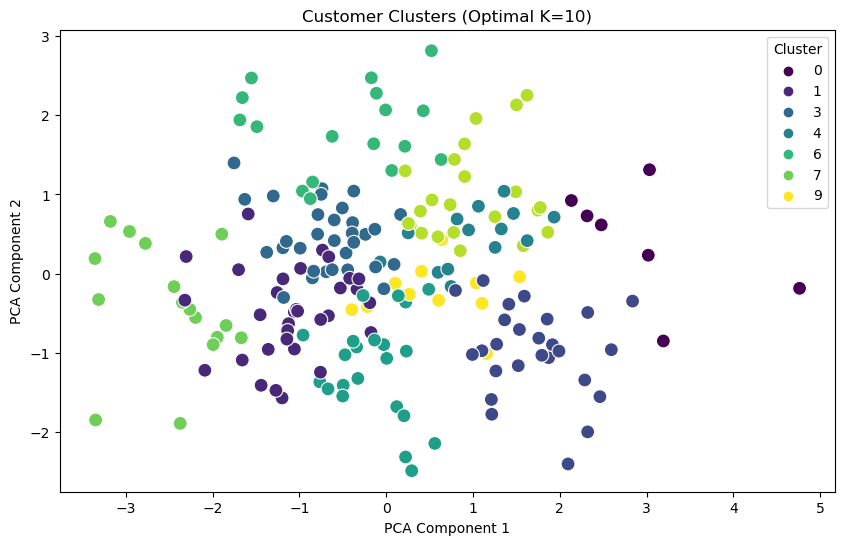

In [42]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
data["PCA1"] = pca_features[:, 0]
data["PCA2"] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="viridis", s=100)
plt.title(f"Customer Clusters (Optimal K={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

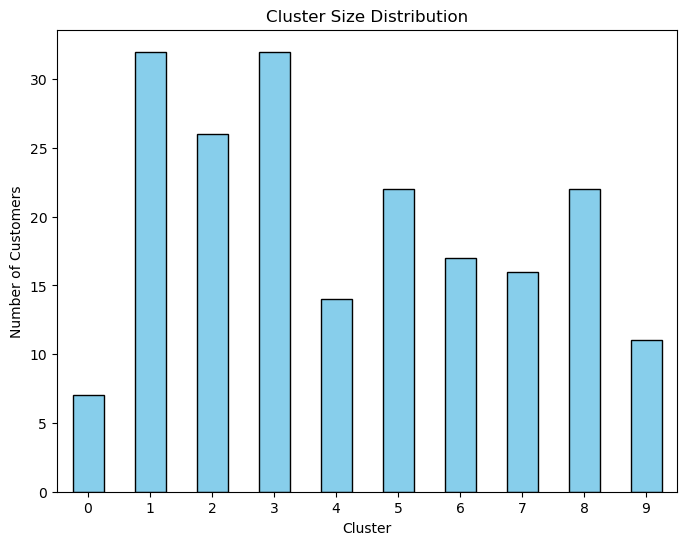

In [43]:
# Cluster Size Distribution
plt.figure(figsize=(8, 6))
data["Cluster"].value_counts().sort_index().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

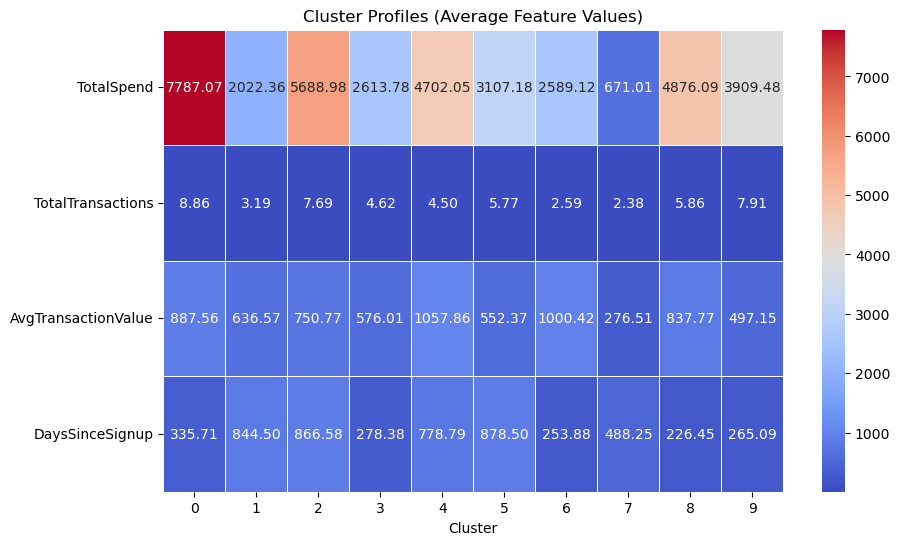

In [44]:
# Cluster Profiles - Heatmap
cluster_profiles = data.groupby("Cluster")[
    ["TotalSpend", "TotalTransactions", "AvgTransactionValue", "DaysSinceSignup"]
].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cluster Profiles (Average Feature Values)")
plt.show()

In [ ]:
# Pairplot
sns.pairplot(
    data,
    vars=["TotalSpend", "TotalTransactions", "AvgTransactionValue", "DaysSinceSignup"],
    hue="Cluster",
    palette="viridis",
)
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()


In [46]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"DB Index for Optimal Clusters: {db_scores[optimal_k - 2]:.2f}")

Optimal Number of Clusters: 10
DB Index for Optimal Clusters: 0.98
